In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# Files to Load
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [2]:
# Calculate the total number of unique schools
total_unique_schools = school_data_complete['school_name'].nunique()
print(f'Total number of unique schools: {total_unique_schools}')

Total number of unique schools: 15


In [3]:
# Calculate the total number of students
student_count = school_data_complete ['Student ID'].nunique()
print(f'Total number of students: {student_count}')

Total number of students: 39170


In [4]:
# Create a DataFrame from school_data_complete
df = pd.DataFrame(school_data_complete)

# Calculate the total budget by summing the 'budget' column
total_budget = df['budget'].sum()

print(total_budget)

82932329558


In [5]:
# Calculate the average (mean) math score
average_math_score = df['math_score'].mean()
print(average_math_score)

78.98537145774827


In [6]:
# Calculate the average (mean) reading score
average_reading_score = df ['reading_score'].mean()
print(average_reading_score)

81.87784018381414


In [7]:
# Calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["Student ID"]
passing_math_percentage = passing_math_count / float(student_count) * 100
print(passing_math_percentage)

74.9808526933878


In [8]:
# Calculate the percentage of students who passed reading
passing_reading_count = school_data_complete [(school_data_complete["reading_score"] >= 70)].count()["Student ID"]
passing_reading_percentage = passing_reading_count/float(student_count) * 100
print(passing_reading_percentage)

85.80546336482001


In [9]:
# Calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["Student ID"]
overall_passing_rate = passing_math_reading_count /float(student_count)* 100
print(overall_passing_rate)

65.17232575950983


In [10]:
# District Summary: create a high-level snapshot of the district's key metrics in a DataFrame.
# Include the following: 
# Total number of unique schools
# Total students
# Total budget
# Average math score
# Average reading score
# % passing math (the percentage of students who passed math)
# % passing reading (the percentage of students who passed reading)
# % overall passing (the percentage of students who passed math AND reading)

# Create a DataFrame
district_summary = {"Total School Count":[total_unique_schools],"Total Students":[student_count],
                    "Total Budget":[total_budget],"Average Math Score": 
                    [average_math_score], "Average Reading Score":[average_reading_score], 
                    "Percentage of Students Proficient in Math":[passing_math_percentage],
                    "Percentage of Students Proficient in Reading": [passing_reading_percentage],
                    "Percentage of Students Meeting Proficiency in Math and Reading":[overall_passing_rate]}
district_summary_df = pd.DataFrame(district_summary)

# Display the DataFrame
district_summary_df

,Total School Count,Total Students,Total Budget,Average Math Score,Average Reading Score,Percentage of Students Proficient in Math,Percentage of Students Proficient in Reading,Percentage of Students Meeting Proficiency in Math and Reading
0,15,39170,82932329558,78.985371,81.87784,74.980853,85.805463,65.172326


In [11]:
# Group by school_name to get the school types
school_types = school_data_complete.groupby("school_name")["type"].first().reset_index()
school_types = school_types.rename(columns={"type": "school_type"})  # Rename the column to "school_type"

# Merge the school types back to the original DataFrame based on school_name
school_data_with_types = pd.merge(school_data_complete, school_types, on="school_name")

# Display the school names and their corresponding types
print(school_data_with_types[["school_name", "school_type"]])

              school_name school_type
0       Huang High School    District
1       Huang High School    District
2       Huang High School    District
3       Huang High School    District
4       Huang High School    District
...                   ...         ...
39165  Thomas High School     Charter
39166  Thomas High School     Charter
39167  Thomas High School     Charter
39168  Thomas High School     Charter
39169  Thomas High School     Charter

[39170 rows x 2 columns]


In [12]:
# Calculate the total student count per school from school_data_complete
student_count_per_school = school_data_complete.groupby("school_name").size()
print (student_count_per_school)

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
dtype: int64


In [13]:
# Calculate the total school budget per school
per_school_budget = school_data_complete.groupby("school_name")["budget"].mean()

# Calculate the per capita spending per school
per_school_capita = per_school_budget/student_count_per_school

print(per_school_budget)

school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64


In [14]:
# Calculate the average Math scores per school from school_data_complete. Use group_by with an aggregate function.
average_math_score_per_school = school_data_complete.groupby("school_name").mean(numeric_only=True)["math_score"]

In [15]:
# Calculate the average Reading scores per school
average_reading_score_per_school = school_data_complete.groupby("school_name").mean(numeric_only=True)["reading_score"]

In [16]:
# Calculate the number of students per school who are passing Math
# Filter the rows where math score is 70 or higher
passing_math = school_data_complete[school_data_complete["math_score"] >= 70]

# Group by school name and count the number of students
students_per_school_passing_math = passing_math.groupby("school_name")["Student ID"].count()

print(students_per_school_passing_math)

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: Student ID, dtype: int64


In [17]:
# Calculate the number of students per school who are passing Reading
# Filter the rows where Reading score is 70 or higher
passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70]

# Group by school name and count the number of students
students_per_school_passing_reading = passing_reading.groupby("school_name")["Student ID"].count()

In [18]:
# Calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()

In [19]:
# Calculate the passing rates
per_school_passing_math = students_per_school_passing_math / student_count_per_school * 100
per_school_passing_reading = students_per_school_passing_reading / student_count_per_school * 100
overall_passing_rate = school_students_passing_math_and_reading / student_count_per_school * 100
print(overall_passing_rate)

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64


In [20]:
# Create the per_school_summary dictionary
per_school_summary = {
    "School Type": school_types.set_index("school_name")["school_type"],
    "Total Students": student_count_per_school,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": average_math_score_per_school,
    "Average Reading Score": average_reading_score_per_school,
    "Percent Passing Math": per_school_passing_math,
    "Percent Passing Reading": per_school_passing_reading,
    "Percent Overall Passing": overall_passing_rate
}
# Create the per_school_summary DataFrame
per_school_summary_df = pd.DataFrame(per_school_summary)

# Display the DataFrame
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Percent Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,53.539172


In [27]:
# Show highest performing schools: Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
per_school_summary_df.sort_values("Percent Overall Passing", ascending=False, inplace=True)

# Save the top 5 in a DataFrame called "top_schools".
top_schools_df = per_school_summary_df.head(5)

# Display results
top_schools_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Percent Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,1043130.0,638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,1319574.0,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,585858.0,609.0,83.839917,84.044699,94.594595,95.945946,90.540541


In [28]:
# Show lowest performing schools: Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
per_school_summary_df.sort_values('Percent Overall Passing', inplace=True)

# Save the results in a DataFrame called "bottom_schools".
bottom_schools_df = per_school_summary_df.head(5)

bottom_schools_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Percent Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,2547363.0,637.0,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,53.539172


In [29]:
# Calculate Math Scores by Grade
# Separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Group by `school_name` and take the mean of the `math_score` column for each grade
ninth_grade_math_scores = ninth_graders.groupby("school_name")["math_score"].mean()
tenth_grade_math_scores = tenth_graders.groupby("school_name")["math_score"].mean()
eleventh_grade_math_scores = eleventh_graders.groupby("school_name")["math_score"].mean()
twelfth_grade_math_scores = twelfth_graders.groupby("school_name")["math_score"].mean()

# Combine each of the scores above into a single DataFrame called `math_scores_by_grade`
math_scores_by_grade = {
    '9th Grade Math Average': ninth_grade_math_scores,
    '10th Grade Math Average': tenth_grade_math_scores,
    '11th Grade Math Average': eleventh_grade_math_scores,
    '12th Grade Math Average': twelfth_grade_math_scores
}

math_scores_by_grade_df = pd.DataFrame(math_scores_by_grade)

# Minor data wrangling
math_scores_by_grade_df.index.name = None

# Display the DataFrame
math_scores_by_grade_df

,9th Grade Math Average,10th Grade Math Average,11th Grade Math Average,12th Grade Math Average
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


In [30]:
# Calculate Reading Scores by Grade

# Group by `school_name` and take the mean of the `reading_score` column for each grade
ninth_grade_reading_scores = ninth_graders.groupby("school_name")["reading_score"].mean()
tenth_grade_reading_scores = tenth_graders.groupby("school_name")["reading_score"].mean()
eleventh_grade_reading_scores = eleventh_graders.groupby("school_name")["reading_score"].mean()
twelfth_grade_reading_scores = twelfth_graders.groupby("school_name")["reading_score"].mean()

# Combine each of the scores above into a single DataFrame called `math_scores_by_grade`
math_scores_by_grade = {
    '9th Grade Reading Average': ninth_grade_reading_scores,
    '10th Grade Reading Average': tenth_grade_reading_scores,
    '11th Grade Reading Average': eleventh_grade_reading_scores,
    '12th Grade Reading Average': twelfth_grade_reading_scores
}

reading_scores_by_grade_df = pd.DataFrame(math_scores_by_grade)

# Minor data wrangling
reading_scores_by_grade_df.index.name = None

# Display the DataFrame
reading_scores_by_grade_df

,9th Grade Reading Average,10th Grade Reading Average,11th Grade Reading Average,12th Grade Reading Average
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


In [31]:
# Create a table that breaks down school performance based on average spending ranges (per student).
# Establish the bins
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

# Create a copy of the school summary since it has the "Per Student Budget"
school_spending_df = per_school_summary_df.copy()

# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"], bins=spending_bins, labels=labels)

school_spending_df = pd.DataFrame(school_spending_df)

# Calculate mean scores per spending range. Modify groupby operations to explicitly set observed parameter.
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"], observed=False)["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"], observed=False)["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"], observed=False)["Percent Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"], observed=False)["Percent Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"], observed=False)["Percent Overall Passing"].mean()

# Create a new DataFrame to store the calculated averages
spending_summary_df = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "Percent Passing Math": spending_passing_math,
    "Percent Passing Reading": spending_passing_reading,
    "Percent Overall Passing": overall_passing_spending
})

# Display the spending summary DataFrame
spending_summary_df

,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Percent Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


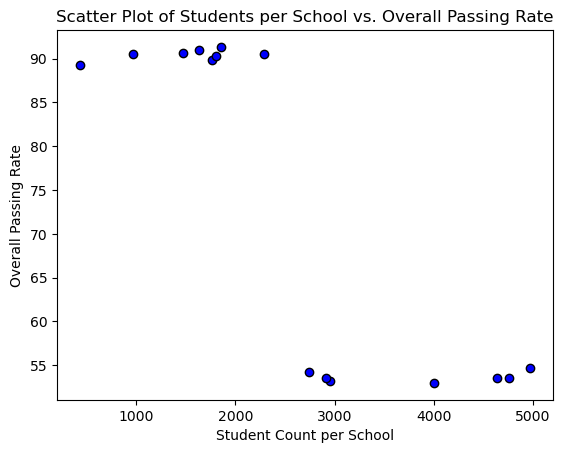

In [47]:
import matplotlib.pyplot as plt
plt.scatter(student_count_per_school, overall_passing_rate, color='b', edgecolors='black')
plt.xlabel("Student Count per School")
plt.ylabel("Overall Passing Rate")
plt.title("Scatter Plot of Students per School vs. Overall Passing Rate")

plt.show()

In [32]:
# Calculate Scores by School Size
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
size_labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [33]:
# Categorize the spending based on the size bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], bins=size_bins, labels= size_labels)

In [34]:
# Calculate averages for the desired columns based on school size with observed=False parameter.
size_math_scores = per_school_summary_df.groupby(["School Size"], observed=False)["Average Math Score"].mean()
size_reading_scores = per_school_summary_df.groupby(["School Size"], observed=False)["Average Reading Score"].mean()
size_passing_math = per_school_summary_df.groupby(["School Size"], observed=False)["Percent Passing Math"].mean()
size_passing_reading = per_school_summary_df.groupby(["School Size"], observed=False)["Percent Passing Reading"].mean()
size_overall_passing = per_school_summary_df.groupby(["School Size"], observed=False)["Percent Overall Passing"].mean()

In [35]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary_df = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "Percent Passing Math": size_passing_math,
    "Percent Passing Reading": size_passing_reading,
    "Percent Overall Passing": size_overall_passing
})

# Display results
size_summary_df

,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Percent Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [36]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary_df.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary_df.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary_df.groupby(["School Type"])["Percent Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary_df.groupby(["School Type"])["Percent Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary_df.groupby(["School Type"])["Percent Overall Passing"].mean()

In [37]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary_df = pd.DataFrame({
    "Average Math Score by School Type": average_math_score_by_type,
    "Average Reading Score by School Type": average_reading_score_by_type,
    "Average % Passing Math by School Type": average_percent_passing_math_by_type,
    "Average % Passing Reading by School Type": average_percent_passing_reading_by_type,
    "Average % Overall Passing by School Type": average_percent_overall_passing_by_type,
})

# Display results
type_summary_df

,Average Math Score by School Type,Average Reading Score by School Type,Average % Passing Math by School Type,Average % Passing Reading by School Type,Average % Overall Passing by School Type
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
